<a href="https://colab.research.google.com/github/sanuli21/telco-churn-project/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
folders = ["notebooks", "data", "reports", "models"]
for folder in folders:
  if not os.path.exists(folder):
    os.makedirs(folder)
    print(f"{folder} created")
  else:
    print(f"Folder already exists: {folder}")
print("Folders ready.")

notebooks created
data created
reports created
models created
Folders ready.


In [2]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
import shutil
#moving uploaded CSV to data folder
shutil.move("telco.csv", "data/telco.csv")
print("Dataset moved to data/folder")

Dataset moved to data/folder


In [4]:
#importing basic libraries
import pandas as pd
import numpy as np

#to ignore warnings to keep notebook clean
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")

Libraries imported.


In [5]:
#loading dataset
data_path = "data/telco.csv"
df = pd.read_csv(data_path)

print("Dataset loaded")
print("\nFirst 5 rows: \n", df.head())


Dataset loaded

First 5 rows: 
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

In [6]:
# Basic dataset info
print("Dataset Shape: ", df.shape)
df.info()
df.describe()

Dataset Shape:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#checking for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
empty_totalcharges = df[df['TotalCharges'].str.strip() == '']
print("No of empty totalCharges: ", len(empty_totalcharges))
print(empty_totalcharges)

No of empty totalCharges:  11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             

In [9]:
#Filling the 11 TotalCharges which has empty strings with 0 as they become NaNs when converted to Numeric if not handled

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
print("Missing values now: ", df['TotalCharges'].isnull().sum())


Missing values now:  0


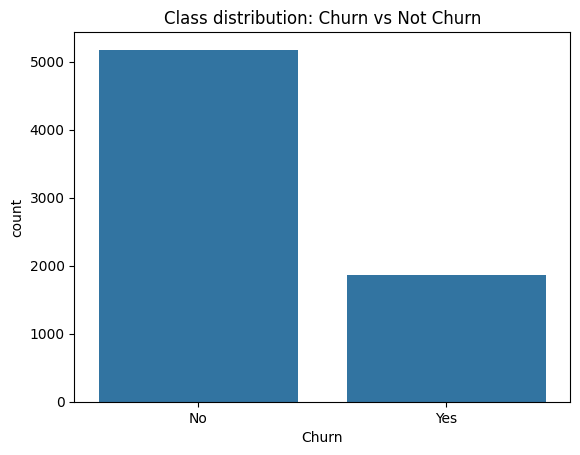

,proportion
Churn,
No,73.463013
Yes,26.536987


In [10]:
# Check distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Class distribution: Churn vs Not Churn")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


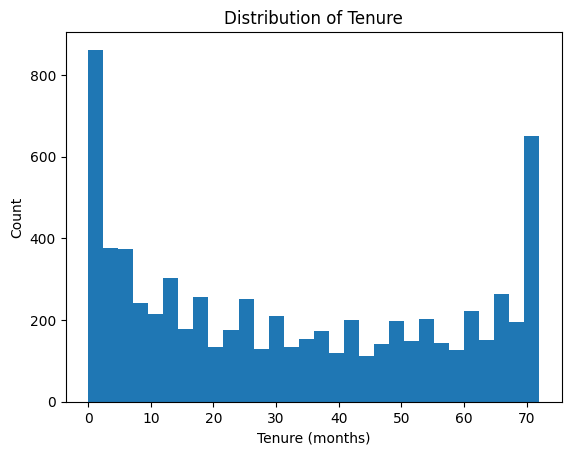

In [11]:
#visulaize tenure distibution
plt.hist(df['tenure'], bins=30) #using 30 so it gives a detailed shape of the distribution
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


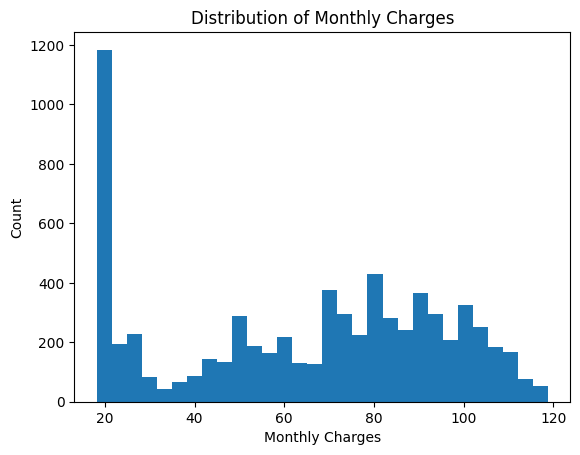

In [12]:
#monthly charges distribution

plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

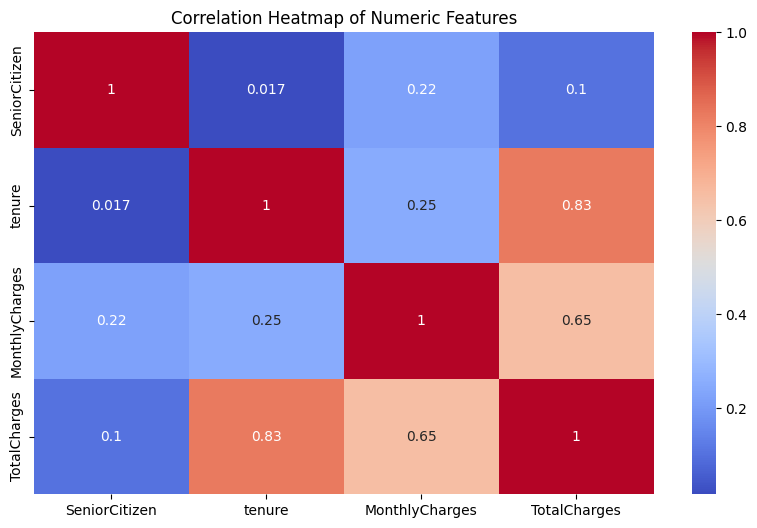

In [13]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

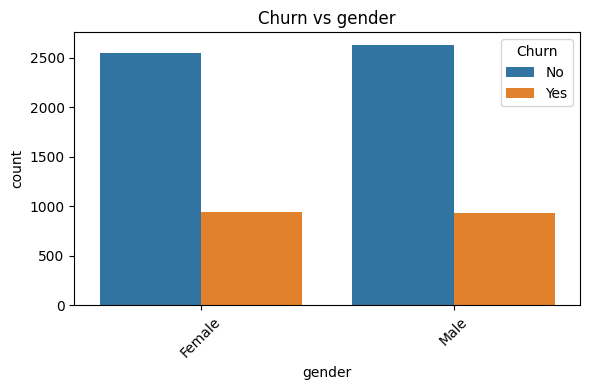

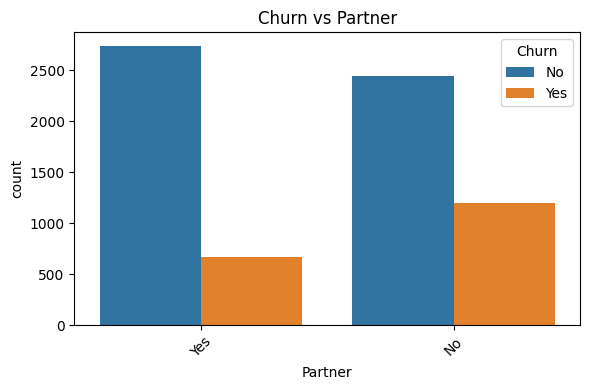

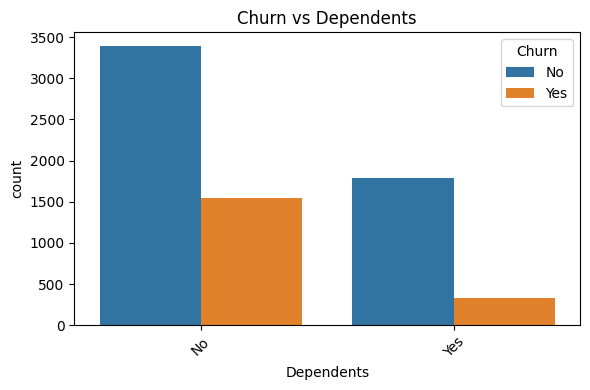

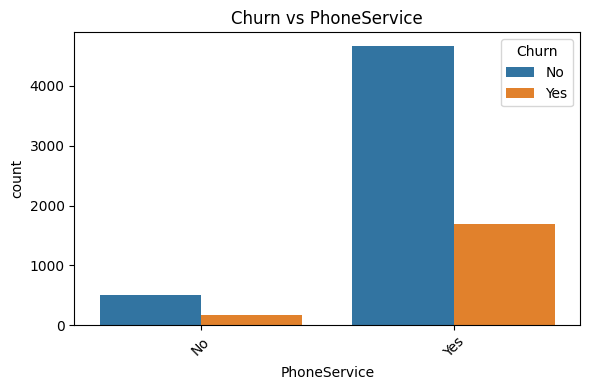

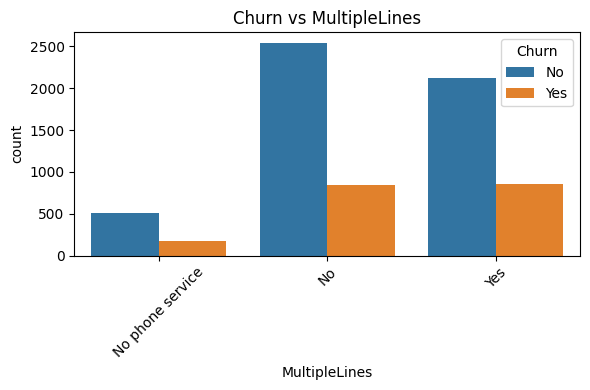

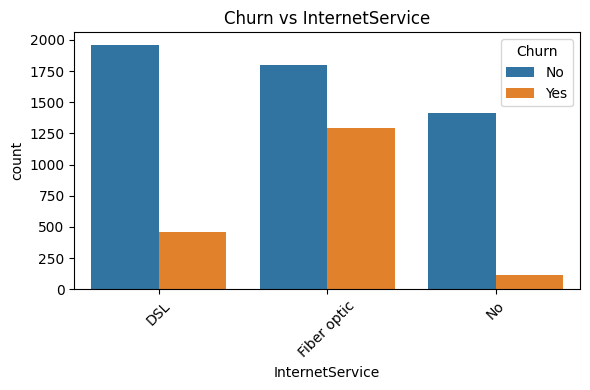

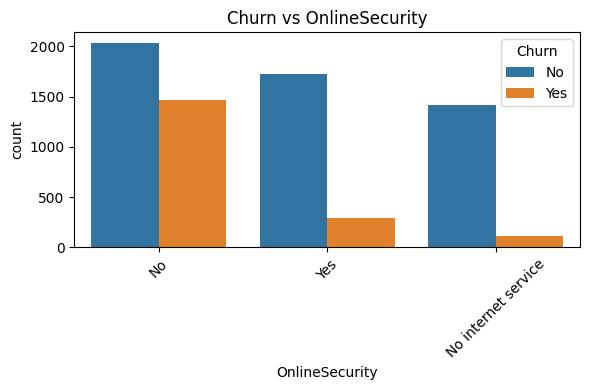

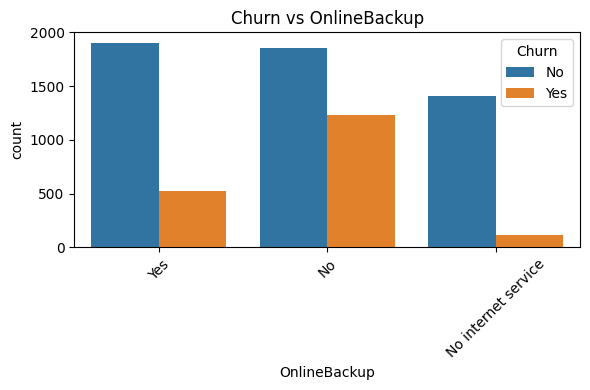

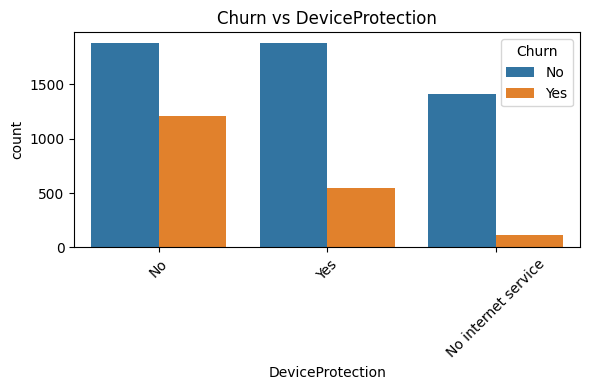

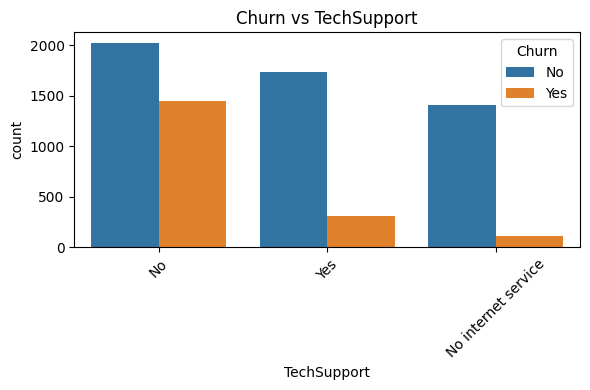

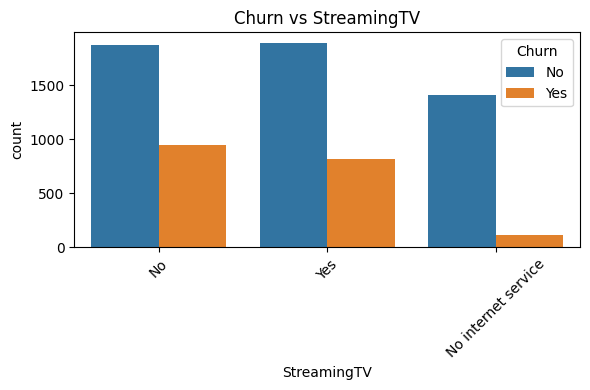

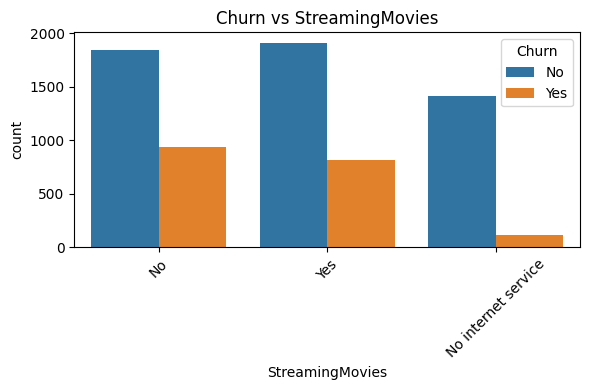

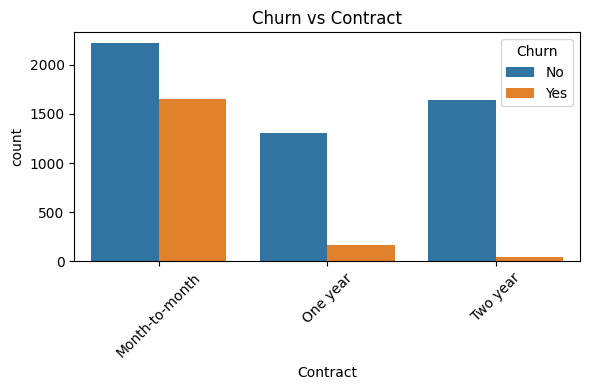

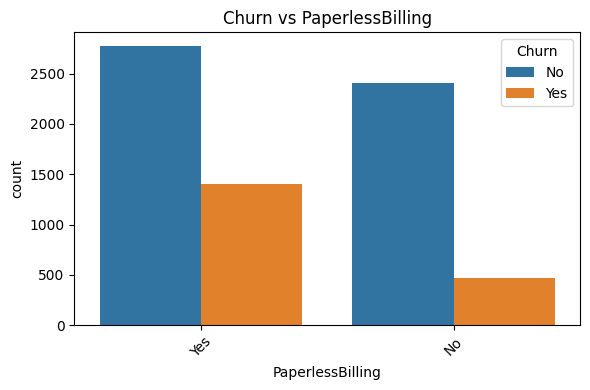

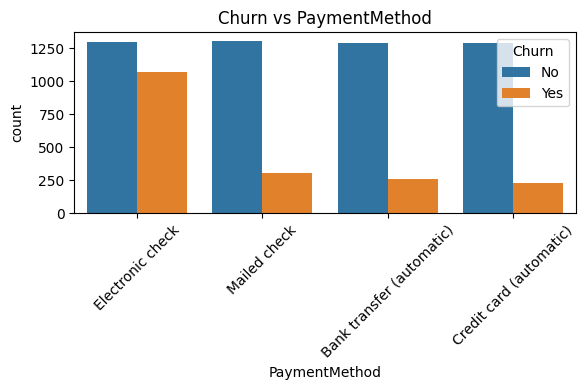

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns #picking all columns that are strings

for col in categorical_cols: #creating one chart per categorical fetaure
  if col not in ['customerID', 'Churn']: #as CustomerID is unique for every row
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Churn vs {col}")
    plt.xticks(rotation=45) #to rotate labels if long
    plt.tight_layout()
    plt.show()

# EDA Insights Summary

#1. Dataset Overview
- 7,043 rows, 21 features.
- No severe missing values, except in **TotalCharges**, which was cleaned.

#2. Class Distribution
- Churn = 26.5%
- Not churn = 73.5%
- Dataset is imbalanced.

#3. Numerical Insights
- Customers with **high MonthlyCharges **tend to churn more.
- Customers with **low tenure** have significantly higher churn.

#4. Categorical Insights
- **Month-to-Month** contract - highest churn.
- **Electronic Check** users - high churn.
- **Fiber optic** internet users - higher churn
- Customers with **no partner / no dependants** - more churn.

#5. Key relationships
- **Contract type** is the strongest churn predictor.
- **Payment method**, **Internet service**, and tech-related add-ons also influence churn.

In [48]:
import pandas as pd
import numpy as np

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

df_fe = df.copy()

print("1. Cretaing tenure groups...")
df_fe['tenure_group'] = pd.cut(df_fe['tenure'],
                               bins=[0,6,12, 24, 48, 72],
                               labels=['0-6m', '6-12m', '1-2y', '2-4y', '4-6y'])

print("2. Creating charge ration feature...")
df_fe['charge_ratio'] = df_fe['MonthlyCharges'] / (df_fe['TotalCharges'] + 1)
df_fe['charge_ratio'].fillna(0, inplace=True)

print("3. Creating average monthly charge feature...")
df_fe['avg_monthly_charge'] = df_fe['TotalCharges'] / (df_fe['tenure'] + 1)
df_fe['avg_monthly_charge'].fillna(0, inplace=True)


print("4. Creating service count feature...")
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
df_fe['service_count'] = 0;
for col in service_columns:
  df_fe['service_count'] += (df_fe[col] == 'Yes').astype(int)

print("5. Cretaing new customer flag...")
df_fe['is_new_customer'] = (df_fe['tenure'] <= 3).astype(int)

print("6. Creating high spender flag...")
median_charge = df_fe['MonthlyCharges'].median()
df_fe['is_high_spender'] = (df_fe['MonthlyCharges'] >= median_charge).astype(int)

print("7. Cretaing contract simplified feature...")
contract_map = {'Month-to-month': 'short', 'One year': 'medium', 'Two year': 'long'}
df_fe['contract_simple'] = df_fe['Contract'].map(contract_map)

print(f"\nOriginal shape: {df.shape}")
print(f"After feature engineering: {df_fe.shape}")
print(f"Added {df_fe.shape[1] - df.shape[1]} new features")

print("\nNew features created:")
new_features = [col for col in df_fe.columns if col not in df.columns]
for i, feat in enumerate(new_features, 1):
  print(f"{i}. {feat}")

print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETE")
print("="*60)



# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

#splitting features and traget
X = df_fe.drop('Churn', axis = 1) #all features used to predict churn
y = df_fe['Churn']

#encoding target variable(converting yes no of churn column to 1 and 0)
label_y = LabelEncoder()
y = label_y.fit_transform(y)

#identify categorical and numeric columns as categorical columns need one hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'customerID' in categorical_cols:
  categorical_cols.remove('customerID') #as it's just an idnetifier not a feature

print(f"\nCategorical columns: {len(categorical_cols)}")
print(f"Numeric columns: {len(numeric_cols)}")
print(f"Total features before encoding: {len(categorical_cols) + len(numeric_cols)}")


#OneHotEncoder converts each category into a new column
preprocessor = ColumnTransformer( #ColumnTransformer apply OneHotEncoder only to categorical features and keep numeric features as they are
    transformers = [
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_encoded = preprocessor.fit_transform(X)

#convert to dataframe
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_cols = numeric_cols + list(encoded_cat_cols)
df_encoded = pd.DataFrame(X_encoded, columns=all_cols)

print("\nCategorical columns encoded successfully.")
print(f"Shape after encoding: {df_encoded.shape}")
print(f"Total features: {df_encoded.shape[1]}")

df_encoded.head()


FEATURE ENGINEERING
1. Cretaing tenure groups...
2. Creating charge ration feature...
3. Creating average monthly charge feature...
4. Creating service count feature...
5. Cretaing new customer flag...
6. Creating high spender flag...
7. Cretaing contract simplified feature...

Original shape: (7043, 21)
After feature engineering: (7043, 28)
Added 7 new features

New features created:
1. tenure_group
2. charge_ratio
3. avg_monthly_charge
4. service_count
5. is_new_customer
6. is_high_spender
7. contract_simple

FEATURE ENGINEERING COMPLETE

Categorical columns: 17
Numeric columns: 9
Total features before encoding: 26

Categorical columns encoded successfully.
Shape after encoding: (7043, 42)
Total features: 42


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,charge_ratio,avg_monthly_charge,service_count,is_new_customer,is_high_spender,gender_Male,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2y,tenure_group_2-4y,tenure_group_4-6y,tenure_group_6-12m,tenure_group_nan,contract_simple_medium,contract_simple_short
0,0.0,1.0,29.85,29.85,0.967585,14.925000,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,34.0,56.95,1889.50,0.030124,53.985714,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,0.493358,36.050000,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.022967,40.016304,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,70.70,151.65,0.463151,50.550000,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# scale numeric features as ML models work better when all numeric features are on a similar scale

from sklearn.preprocessing import StandardScaler

#select numeric columns(all are numeric now)
numeric_cols_scaled = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_encoded[numeric_cols_scaled] = scaler.fit_transform(df_encoded[numeric_cols_scaled])

print("Numeric features scaled.")

df_encoded.head()


Numeric features scaled.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,charge_ratio,avg_monthly_charge,service_count,is_new_customer,is_high_spender,gender_Male,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2y,tenure_group_2-4y,tenure_group_4-6y,tenure_group_6-12m,tenure_group_nan,contract_simple_medium,contract_simple_short
0,-0.439916,-1.277445,-1.160323,-0.992611,0.397851,-1.441115,-0.561776,2.373147,-1.00071,-1.009559,...,-0.525047,1.406418,-0.544807,-0.412466,-0.540861,-0.682693,-0.333517,-0.039551,-0.514249,0.904184
1,-0.439916,0.066327,-0.259629,-0.172165,-0.100636,-0.163684,-0.020519,-0.421381,-1.00071,0.990532,...,-0.525047,-0.711026,1.835513,-0.412466,1.848904,-0.682693,-0.333517,-0.039551,1.944582,-1.105970
2,-0.439916,-1.236724,-0.362660,-0.958066,0.145685,-0.750249,-0.020519,2.373147,-1.00071,0.990532,...,-0.525047,-0.711026,1.835513,-0.412466,-0.540861,-0.682693,-0.333517,-0.039551,-0.514249,0.904184
3,-0.439916,0.514251,-0.746535,-0.193672,-0.104442,-0.620536,0.520738,-0.421381,-1.00071,0.990532,...,-0.525047,-0.711026,-0.544807,-0.412466,1.848904,-0.682693,-0.333517,-0.039551,1.944582,-1.105970
4,-0.439916,-1.236724,0.197365,-0.938874,0.129622,-0.276045,-1.103033,2.373147,0.99929,-1.009559,...,-0.525047,1.406418,-0.544807,-0.412466,-0.540861,-0.682693,-0.333517,-0.039551,-0.514249,0.904184


In [51]:
# train-test split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.2, random_state=42, stratify=y
) # we use startify=y so that churn ratio stays the same in both sets

print("Train-test split done.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Train-test split done.
Training set shape: (5634, 42)
Testing set shape: (1409, 42)


In [52]:
# Train descision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    class_weight='balanced',
    random_state = 42
)

dt.fit(X_train, y_train) #training the model

y_pred_dt = dt.predict(X_test) #making predictions

#to evaluate performance
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print("\nConfusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", report_dt)

Decision Tree Accuracy: 0.7310

Confusion Matrix:
 [[835 200]
 [179 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.73      1409



In [53]:
# Hyperparameter tuning for decision tree using GridSearchCV

from sklearn.model_selection import GridSearchCV

# parameter grid to try
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion' : ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

#grid search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

#train final model using best params
dt_best = grid_search.best_estimator_

y_pred_dt_best = dt_best.predict(X_test)

acc_dt_best = accuracy_score(y_test, y_pred_dt_best)
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
report_dt_best = classification_report(y_test, y_pred_dt_best)

print("\nTuned Desicion Tree Test Accuracy:", acc_dt_best)
print("\nConfusion Matrix:\n", cm_dt_best)
print("\nClassification Report:\n", report_dt_best)




Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7326941959114328

Tuned Desicion Tree Test Accuracy: 0.7246273953158269

Confusion Matrix:
 [[825 210]
 [178 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.73      1409



In [54]:
# Build and train a neural netwrok model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

#determine no of features
input_dim = X_train.shape[1]

#calculate class weights for balancing
print("Calculating class weights for neural network...")
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: Non -churn (0) = {class_weight_dict[0]:.3f},"
f"Churn (1) = {class_weight_dict[1]/class_weight_dict[0]:.1f}x more weight")


#build the neural network model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#set up call backs for better training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
        ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr = 0.00001,
        verbose=1
    )
]
print("\nStarting Neural Network training with class balancing...")
print("=" * 60)

#train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2, #20% of training data used to validate the model after each epoch
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

print("=" * 60)
print("Neural Network training complete.")

print(f"\nTraining Summary:")
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f" Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f" Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f" Final training loss: {history.history['loss'][-1]:.4f}")
print(f" Final validation loss: {history.history['val_loss'][-1]:.4f}")

if len(history.history['loss']) < 100:
    print(f" Early stopping triggered at epoch {len(history.history['loss'])}")



Calculating class weights for neural network...
Class weights: Non -churn (0) = 0.681,Churn (1) = 2.8x more weight

Starting Neural Network training with class balancing...
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6849 - loss: 0.6016 - val_accuracy: 0.6841 - val_loss: 0.5662 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.4908 - val_accuracy: 0.7161 - val_loss: 0.5185 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 0.4757 - val_accuracy: 0.7214 - val_loss: 0.5123 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.4541 - val_accuracy: 0.7054 - val_loss: 0.5458 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7623 - loss: 0.4743 - val_accuracy: 0.7249 - val_loss: 0.5093 - learning_rate: 0.0010
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accurac

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Nueral Network Test Accuracy: 0.7672107877927609

Confusion matrix:
[[806 229]
 [ 99 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



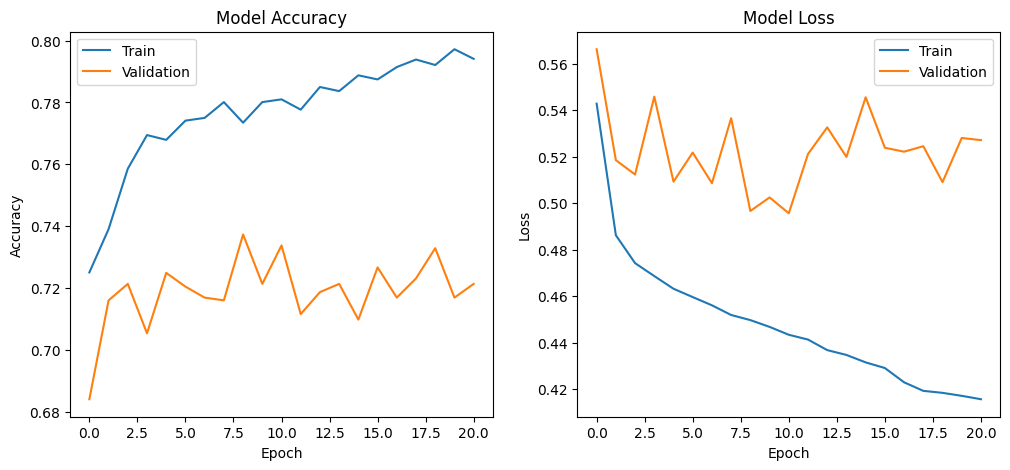

In [55]:
#Evaluate Neural network

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

#calculate the overall accuracy of the model on test data
nn_test_accuracy = accuracy_score(y_test, y_pred_nn)
print("Nueral Network Test Accuracy:", nn_test_accuracy)

#confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion matrix:")
print(cm_nn)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

#plot training accuracy
plt.figure(figsize=(12,5))

#accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

#loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


In [56]:
# Model comparison table

print("\n" + "="*60)
print("Model Comparison Table - Both with class balancing")
print("="*60)

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_proba_dt_best = dt_best.predict_proba(X_test)[:,1]
y_proba_nn = model.predict(X_test).ravel()

#decision tree predictions
y_pred_dt_best = (y_proba_dt_best > 0.5).astype(int)

#neural network predictions
y_pred_nn = (y_proba_nn > 0.5).astype(int)

models = {
    'Decision Tree': (y_pred_dt_best, y_proba_dt_best),
    'Neural Network': (y_pred_nn, y_proba_nn)
}

rows = []

for name, (y_pred_m, y_proba_m) in models.items():
  rows.append({
      'model': name,
      'accuracy': f"{accuracy_score(y_test, y_pred_m):.1%}",
      'precision': f"{precision_score(y_test, y_pred_m):.1%}",
      'recall': f"{recall_score(y_test, y_pred_m):.1%}",
      'f1_score': f"{f1_score(y_test, y_pred_m):.3f}",
      'roc_auc': f"{roc_auc_score(y_test, y_proba_m):.3f}"
  })

df_final = pd.DataFrame(rows)
print(df_final.to_string(index=False))

df_final.to_csv('reports/final_model_comparison_balanced.csv', index=False)
print("\nSaved to: reports/final_model_comparison_balanced.csv")

df_final_numeric = pd.DataFrame([
    {
        'model': 'Decision Tree',
        'accuracy': accuracy_score(y_test, y_pred_dt_best),
        'precision': precision_score(y_test, y_pred_dt_best),
        'recall': recall_score(y_test, y_pred_dt_best),
        'f1_score': f1_score(y_test, y_pred_dt_best),
        'roc_auc': roc_auc_score(y_test, y_proba_dt_best)
    },
    {
        'model': 'Neural Network',
        'accuracy': accuracy_score(y_test, y_pred_nn),
        'precision': precision_score(y_test, y_pred_nn),
        'recall': recall_score(y_test, y_pred_nn),
        'f1_score': f1_score(y_test, y_pred_nn),
        'roc_auc': roc_auc_score(y_test, y_proba_nn)
    }
])

df_final_numeric.to_csv('reports/final_model_comparison_numeric_balanced.csv', index=False)



Model Comparison Table - Both with class balancing
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         model accuracy precision recall f1_score roc_auc
 Decision Tree    72.5%     48.3%  52.4%    0.503   0.661
Neural Network    76.7%     54.6%  73.5%    0.626   0.842

Saved to: reports/final_model_comparison_balanced.csv


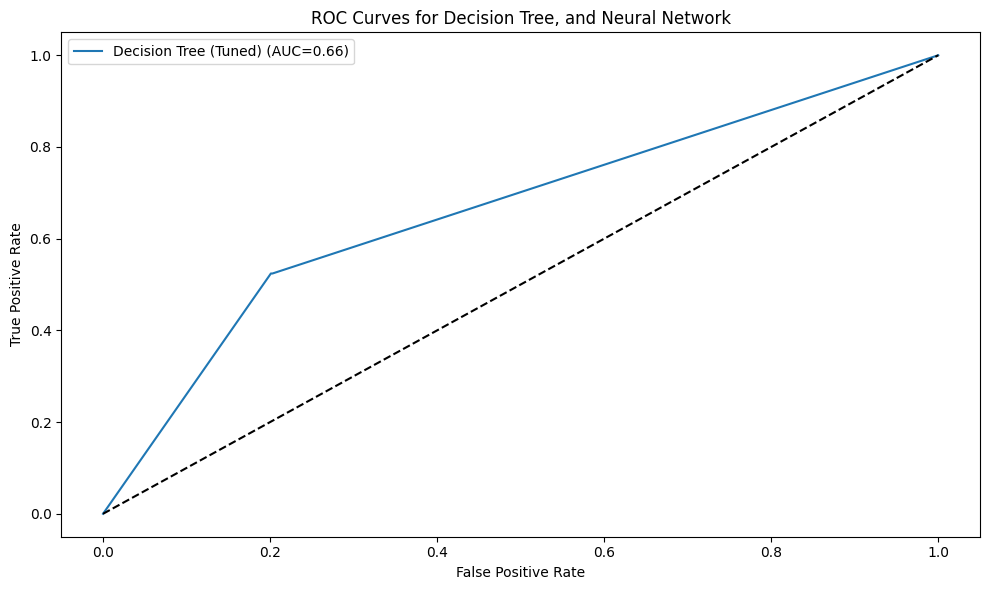

ROC Curve comparison figure saved to reports.roc_comparison.png


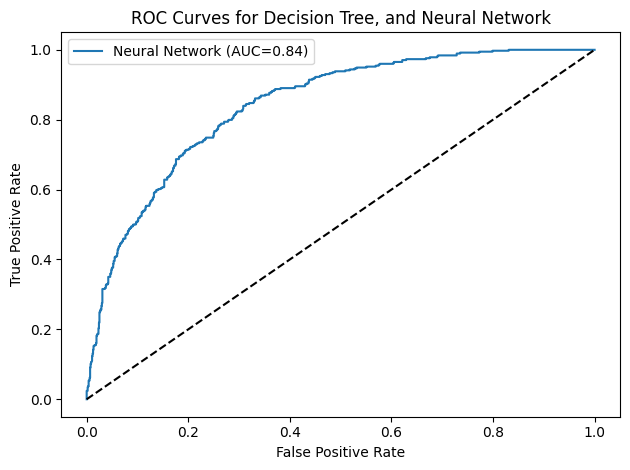

ROC Curve comparison figure saved to reports.roc_comparison.png


In [57]:
# ROC curves for all models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

probas = {
    'Decision Tree (Tuned)': y_proba_dt_best,
    'Neural Network': y_proba_nn
}

plt.figure(figsize=(10,6))

for name, y_proba in probas.items():
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  auc = roc_auc_score(y_test, y_proba)
  plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

  plt.plot([0,1], [0,1], 'k--')

  plt.title("ROC Curves for Decision Tree, and Neural Network")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  plt.tight_layout()

  #save figure
  plt.savefig("reports/roc_comparison.png", dpi=300, bbox_inches='tight')
  plt.show()

  print("ROC Curve comparison figure saved to reports.roc_comparison.png")

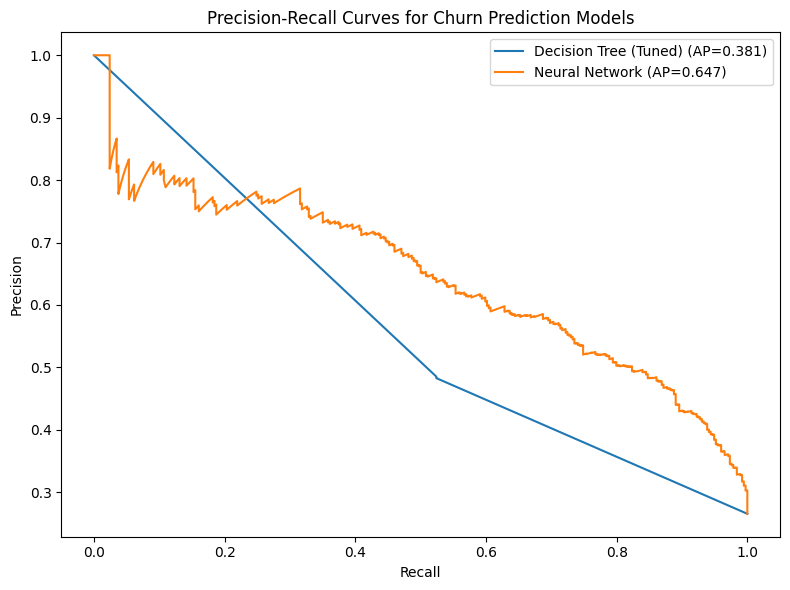

Precision-Recall curves saved to reports/pr_comparison.png


In [58]:
# precision recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

probas = {
    'Decision Tree (Tuned)': y_proba_dt_best,
    'Neural Network': y_proba_nn
}

for name, y_proba in probas.items():
  precision, recall, _ = precision_recall_curve(y_test, y_proba)
  ap = average_precision_score(y_test, y_proba)
  plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Churn Prediction Models")
plt.legend()
plt.tight_layout()

plt.savefig("reports/pr_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("Precision-Recall curves saved to reports/pr_comparison.png")


In [59]:
# Neural network threshold tuning
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_nn)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = f1_scores.argmax()

best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print("Best threshold for neural network:", round(best_threshold, 4))
print("Best F1 score for neural network:", round(best_f1, 4))

y_pred_nn_tuned = (y_proba_nn >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print("\nClassification Report (NN With Tuned Threshold):")
print(classification_report(y_test, y_pred_nn_tuned))


Best threshold for neural network: 0.5511
Best F1 score for neural network: 0.6333

Classification Report (NN With Tuned Threshold):
              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1035
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [60]:
# saving models and predictions

import joblib
import numpy as np
import pandas as pd

#save models
joblib.dump(dt_best, "models/decision_tree_best.pkl")
model.save("models/neural_network.h5")

print("Models saved successfully.")

#save predictions
pred_df = pd.DataFrame({
    "actual": y_test,
    "DT_proba": y_proba_dt_best,
    "NN_proba": y_proba_nn
})

pred_df.to_csv("reports/model_predictions.csv", index=False)
print("Predictions saved to reports/model_predictions.csv")


Models saved successfully.
Predictions saved to reports/model_predictions.csv



DECISION TREE FEATURE IMPORTANCE


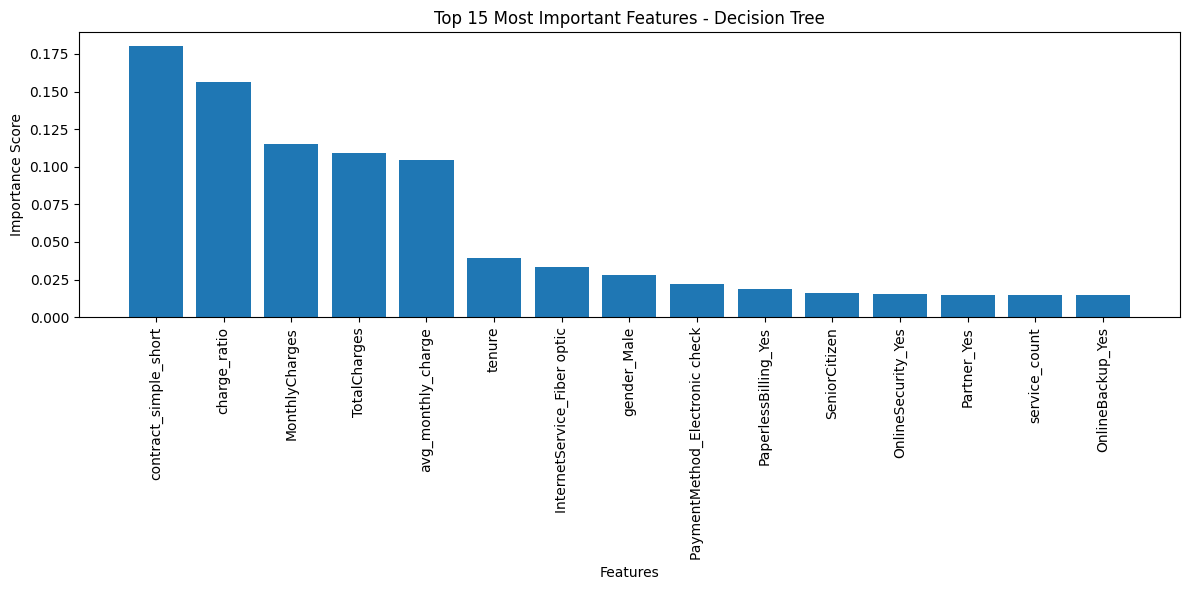


Engineered Features Ranking:
 1. contract_simple_short: 0.1803
 2. charge_ratio: 0.1562
 3. MonthlyCharges: 0.1149
 4. TotalCharges: 0.1089
 5. avg_monthly_charge: 0.1047
 6. tenure: 0.0394
 7. InternetService_Fiber optic: 0.0337
 8. gender_Male: 0.0282
 9. PaymentMethod_Electronic check: 0.0219
 10. PaperlessBilling_Yes: 0.0189
 11. SeniorCitizen: 0.0161
 12. OnlineSecurity_Yes: 0.0152
 13. Partner_Yes: 0.0147
 14. service_count: 0.0147
 15. OnlineBackup_Yes: 0.0145
 16. Dependents_Yes: 0.0135
 17. TechSupport_Yes: 0.0131
 18. MultipleLines_Yes: 0.0109
 19. PaymentMethod_Mailed check: 0.0106
 20. contract_simple_medium: 0.0094
 21. StreamingMovies_Yes: 0.0089
 22. PaymentMethod_Credit card (automatic): 0.0088
 23. StreamingTV_Yes: 0.0083
 24. DeviceProtection_Yes: 0.0080
 25. MultipleLines_No phone service: 0.0040
 26. tenure_group_1-2y: 0.0037
 27. OnlineBackup_No internet service: 0.0034
 28. tenure_group_6-12m: 0.0029
 29. tenure_group_2-4y: 0.0026
 30. Contract_Two year: 0.0024
 

In [63]:
# Feature Importance for decision tree
print("\n" + "="*60)
print("DECISION TREE FEATURE IMPORTANCE")
print("=" * 60)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]

#display top 15 features
top_n = 15
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), importances[indices][:top_n])
plt.xticks(range(top_n), [df_encoded.columns[i] for i in indices[:top_n]], rotation=90)
plt.title(f"Top {top_n} Most Important Features - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig('reports/dt_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

#print top features
print("\nEngineered Features Ranking:")
engineered_features = ['tenure_group', 'charge_ratio', 'avg_monthly_charge','service_count', 'is_new_customer', 'is_high_spender', 'contract_simple']

for i, idx in enumerate(indices):
  feat = df_encoded.columns[idx]
  for eng_feat in feat:
    if eng_feat in feat:
      print(f" {i+1}. {feat}: {importances[idx]:.4f}")
      break

feature_importances_df = pd.DataFrame({
    'feature': df_encoded.columns[indices],
    'importance': importances[indices]
})
feature_importances_df.to_csv('reportsfeature_importance.csv', index=False)
print("\nFeature importance saved to: reports/feature_importance.csv")


In [66]:
# simple NN hyperparameter test

print("\n" + "="*60)
print("NEURAL NETWORK HYPERPARAMETER TESTING")
print("="*60)

def build_test_nn(hidden_units):
  model_test = keras.Sequential([
      layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
      layers.Dropout(0.2),
      layers.Dense(hidden_units//2, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])
  model_test.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model_test

results = {}
for units in [16, 32, 64, 128]:
  print(f"\nTesting with {units} hidden units...")
  model_temp = build_test_nn(units)

  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0)

  history_temp = model_temp.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=100,
      batch_size=32,
      class_weight=class_weight_dict,
      callbacks=[early_stop],
      verbose=0
  )

  #evaluate
  y_pred_temp = (model_temp.predict(X_test, verbose=0) > 0.5).astype(int)
  test_acc = accuracy_score(y_test, y_pred_temp)
  test_recall = recall_score(y_test, y_pred_temp)

  results[units] = {
      'test_accuracy': test_acc,
      'test_recall': test_recall,
      'val_accuracy': history_temp.history['val_accuracy'][-1],
      'epochs': len(history_temp.history['loss'])
  }

  print(f" Test Accuracy: {test_acc:.4f}")
  print(f" Test Recall: {test_recall:.4f}")
  print(f" Epochs trained: {len(history_temp.history['loss'])}")

print("\n" + "-"*40)
print("HYPERPARAMETER TEST RESULTS:")
print("-"*40)


best_units = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
print(f"\n BEST: {best_units} hidden units")

for units, metrics in results.items():
  print(f"\n{units} hidden units:")
  for key, value in metrics.items():
    print(f" {key}: {value:.4f}" if 'accuracy' in key or 'recall' in key
          else f" {key}: {value}")

print(f"\nComparison with original model (32 units):")
print(f" Original accuracy: 0.767")
print(f" Best test accuracy: {results[best_units]['test_accuracy']:.4f}")


NEURAL NETWORK HYPERPARAMETER TESTING

Testing with 16 hidden units...
 Test Accuracy: 0.7445
 Test Recall: 0.8048
 Epochs trained: 19

Testing with 32 hidden units...
 Test Accuracy: 0.7509
 Test Recall: 0.7914
 Epochs trained: 14

Testing with 64 hidden units...
 Test Accuracy: 0.7395
 Test Recall: 0.8182
 Epochs trained: 8

Testing with 128 hidden units...
 Test Accuracy: 0.7488
 Test Recall: 0.7620
 Epochs trained: 8

----------------------------------------
HYPERPARAMETER TEST RESULTS:
----------------------------------------

 BEST: 32 hidden units

16 hidden units:
 test_accuracy: 0.7445
 test_recall: 0.8048
 val_accuracy: 0.7232
 epochs: 19

32 hidden units:
 test_accuracy: 0.7509
 test_recall: 0.7914
 val_accuracy: 0.7267
 epochs: 14

64 hidden units:
 test_accuracy: 0.7395
 test_recall: 0.8182
 val_accuracy: 0.7178
 epochs: 8

128 hidden units:
 test_accuracy: 0.7488
 test_recall: 0.7620
 val_accuracy: 0.7294
 epochs: 8

Comparison with original model (32 units):
 Original a